In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette()

sum(os.path.getsize(f) for f in os.listdir('C:/SCU/Project/Outbrain') if os.path.isfile(f))

2300958

In [ ]:
df_train = pd.read_csv('C:/SCU/Project/Outbrain/clicks_train.csv')
ad_usage_train = df_train.groupby('ad_id')['ad_id'].count()

print(type(ad_usage_train))


In [ ]:
for i in [2, 10, 50, 1000]:
    print('Ads that appear less than {} times: {}%'.format(i, round((ad_usage_train < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(ad_usage_train.values, bins=50, log=True)
plt.xlabel('Number of times ad viwed', fontsize=12)
plt.ylabel('Count of displays with ad', fontsize=12)
plt.show()

([<matplotlib.axis.XTick at 0x234007d3860>,
 <a list of 4 Text xticklabel objects>)

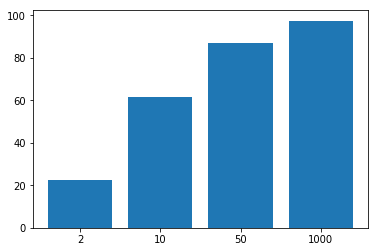

In [3]:
pecentage_dict = {}
for i in [2, 10, 50, 1000]:
    pecentage_dict[i] = round((ad_usage_train < i).mean() * 100, 2)
plt.bar(range(len(pecentage_dict)), list(pecentage_dict.values()), align='center')
plt.xticks(range(len(pecentage_dict)), list(pecentage_dict.keys()))

In [ ]:
60% of the ads were viewed less than 10 times.

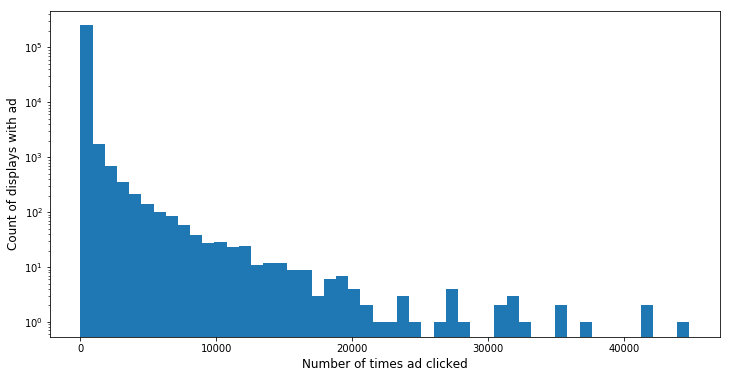

In [4]:
ad_usage_train = df_train[df_train['clicked'] == 1].groupby('ad_id')['ad_id'].count()

plt.figure(figsize=(12, 6))
plt.hist(ad_usage_train.values, bins=50, log=True)
plt.xlabel('Number of times ad clicked', fontsize=12)
plt.ylabel('Count of displays with ad', fontsize=12)
plt.show()

([<matplotlib.axis.XTick at 0x234007bd588>,
 <a list of 4 Text xticklabel objects>)

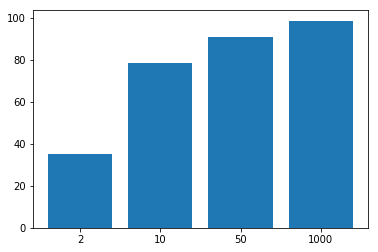

In [5]:
pecentage_dict = {}
for i in [2, 10, 50, 1000]:
    pecentage_dict[i] = round((ad_usage_train < i).mean() * 100, 2)
plt.bar(range(len(pecentage_dict)), list(pecentage_dict.values()), align='center')
plt.xticks(range(len(pecentage_dict)), list(pecentage_dict.keys()))

80% of the ads were clicked less than 10 times

Therefore, there are many ads only shown 1-10 times. But, there are also significant number of Ads that have a large number of displays.

In [6]:
df_test = pd.read_csv('C:/SCU/Project/Outbrain/clicks_test.csv')
df_test.shape

(32225162, 2)

In [7]:
df_train.shape

(87141731, 3)

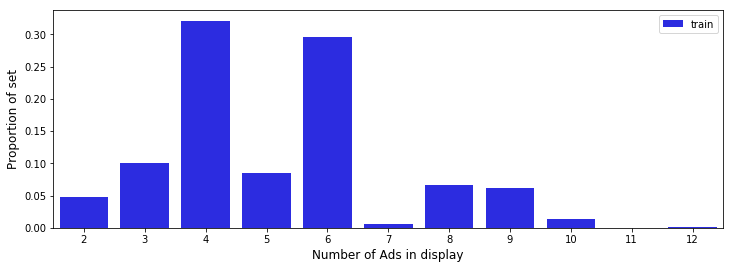

In [9]:
sizes_train = df_train.groupby('display_id')['ad_id'].count().value_counts()
sizes_train = sizes_train / np.sum(sizes_train)

plt.figure(figsize=(12,4));
sns.barplot(sizes_train.index, sizes_train.values, alpha=0.95, color='b', label='train');
plt.legend();
plt.xlabel('Number of Ads in display', fontsize=12);
plt.ylabel('Proportion of set', fontsize=12);

Above Barplot shows that most of the diplays have 4 or 6 ads. 

In [12]:
events = pd.read_csv('C:/SCU/Project/Outbrain/events.csv')
events.shape

C:\Users\nisha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(23120126, 6)

uuid
ef7761dd22277c    38
45d23867dbe3b3    38
c0bd502c7a479f    42
2759b057797f02    46
b88553e3a2aa29    49
Name: uuid, dtype: int64
Users that appear less than 2 times: 88.42%
Users that appear less than 5 times: 99.51%
Users that appear less than 10 times: 99.96%


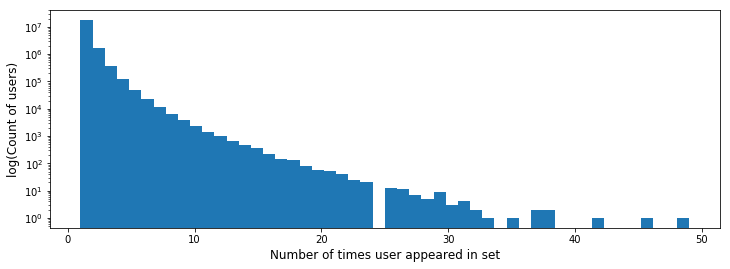

In [13]:
uuid_counts = events.groupby('uuid')['uuid'].count().sort_values()

print(uuid_counts.tail())

for i in [2, 5, 10]:
    print('Users that appear less than {} times: {}%'.format(i, round((uuid_counts < i).mean() * 100, 2)))
    
plt.figure(figsize=(12, 4))
plt.hist(uuid_counts.values, bins=50, log=True)
plt.xlabel('Number of times user appeared in set', fontsize=12)
plt.ylabel('log(Count of users)', fontsize=12)
plt.show()